## Analisis Multivariate Orange Quality Data

Nama Kelompok: Cheesecake

Nama Anggota:
1. Nikita Aprilia Ozzari (23083010028)
2. Indira Zein Rizqin (23083010015)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C://Users//Nikita Ozzari//Documents//Orange Quality Data.csv")
df.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [3]:
df.shape

(241, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [5]:
total = df.isnull().sum().sort_values(ascending=False)
total

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

In [6]:
df.columns

Index(['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
       'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Color',
       'Variety', 'Blemishes (Y/N)', 'Quality (1-5)'],
      dtype='object')

In [7]:
# Tampilkan tipe data tiap kolom dalam dataset
print("Tipe data tiap kolom dalam dataset:")
print(df.dtypes)

# Definisikan kolom nominal, ordinal, interval, dan rasio
nominal_columns = ['color', 'variety', 'blemishes']
ordinal_columns = ['Softness', 'Ripeness', 'Quality']
interval_column = ['pH (Acidity)']
ratio_columns = ['Size', 'Weight', 'Brix', 'HarvestTime']

Tipe data tiap kolom dalam dataset:
Size (cm)             float64
Weight (g)              int64
Brix (Sweetness)      float64
pH (Acidity)          float64
Softness (1-5)        float64
HarvestTime (days)      int64
Ripeness (1-5)        float64
Color                  object
Variety                object
Blemishes (Y/N)        object
Quality (1-5)         float64
dtype: object


In [8]:
df.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


## Memeriksa outlier

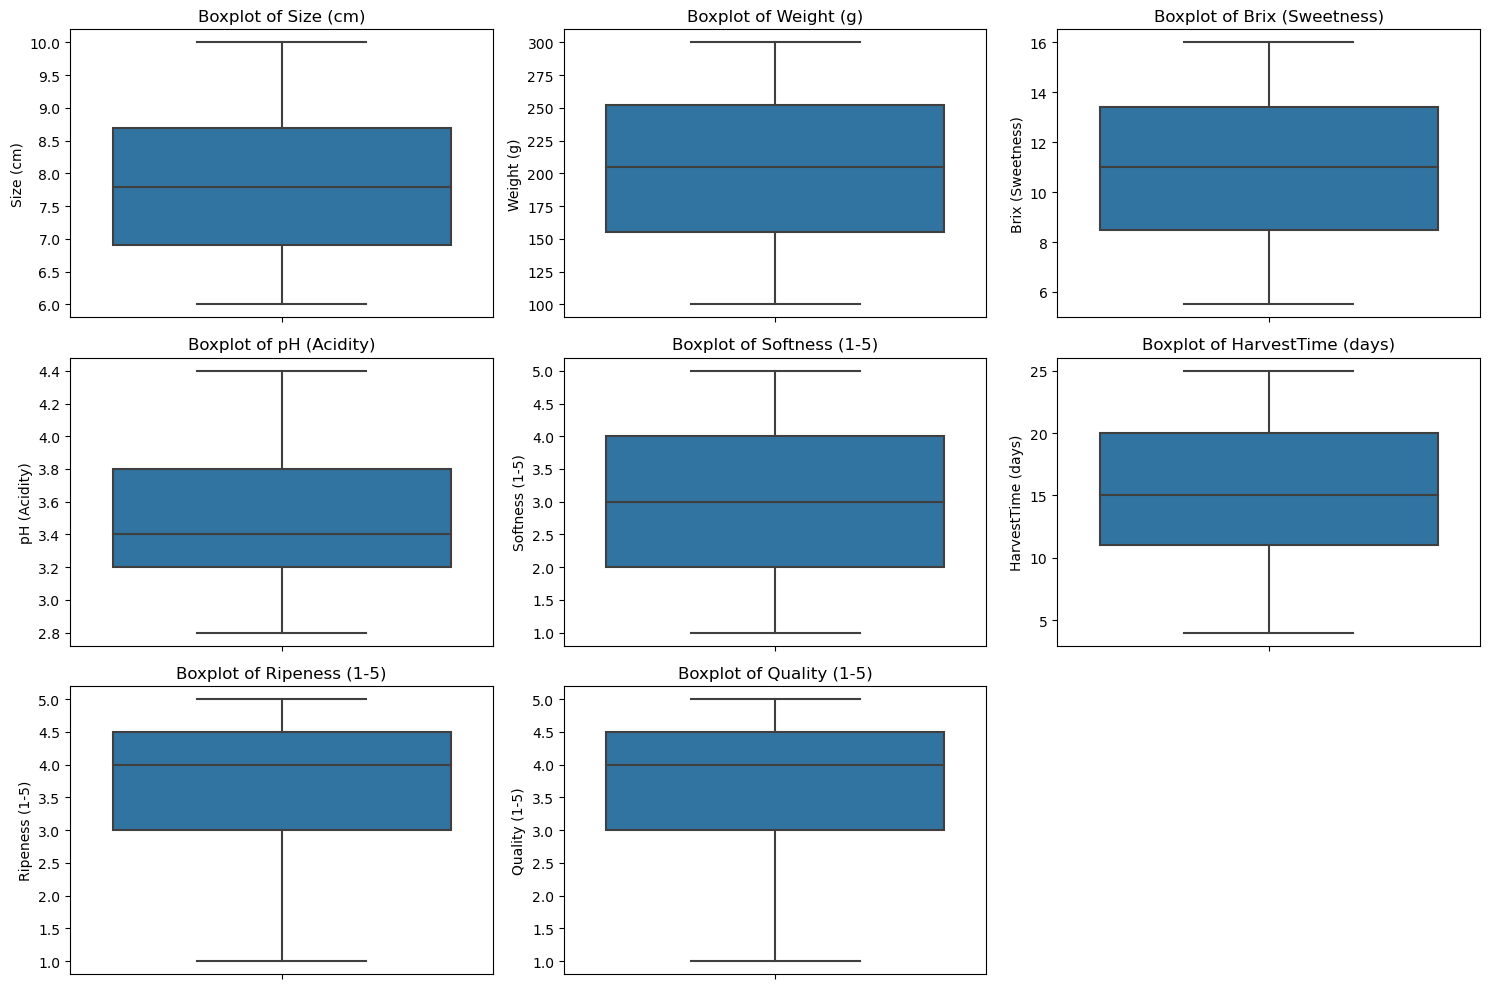

In [9]:
# Memeriksa outlier dengan menggunakan boxplot
# Variabel yang akan digunakan
columns_to_check = ['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 
                    'pH (Acidity)', 'Softness (1-5)', 
                    'HarvestTime (days)', 'Ripeness (1-5)', 
                    'Quality (1-5)']

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])  
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Dari gambar boxplot yang dihasilkan dapat disimpulkan bahwa tidak terdapat outlier pada setiap variabel karena data yang terdapat pada setiap variabel memiliki distribusi yang seimbang. 

## Displot

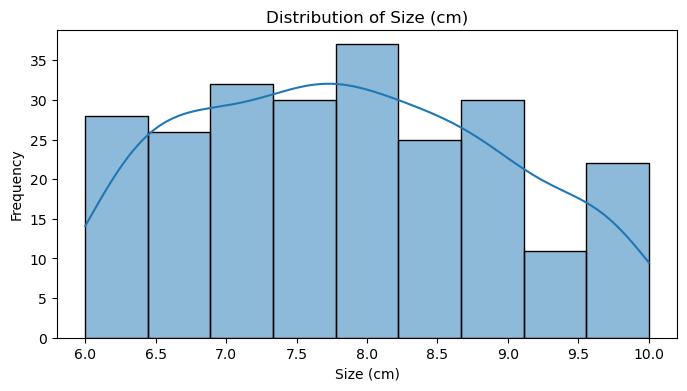

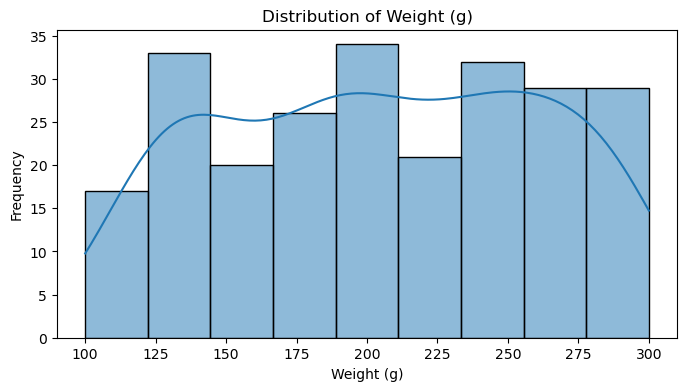

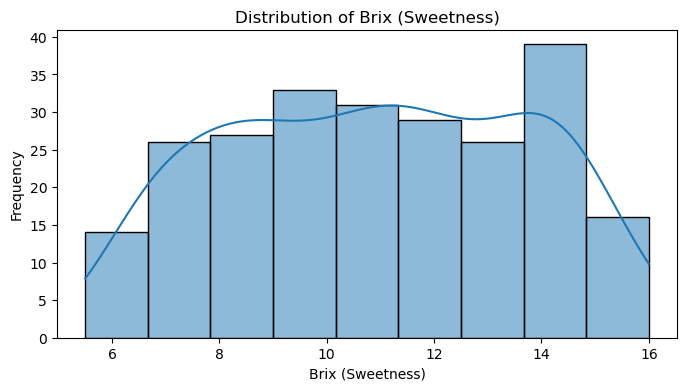

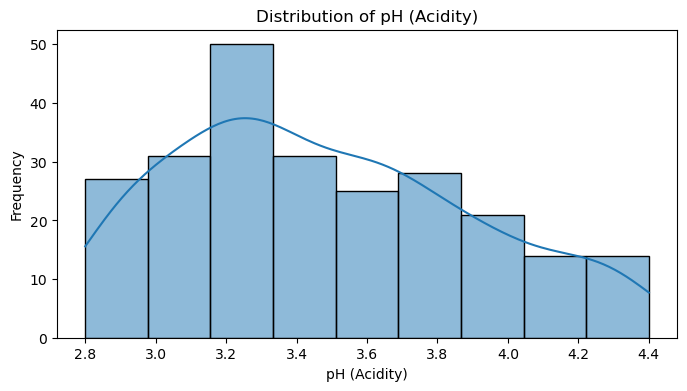

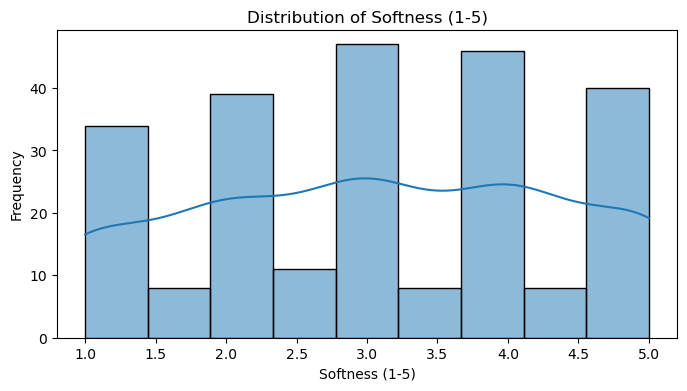

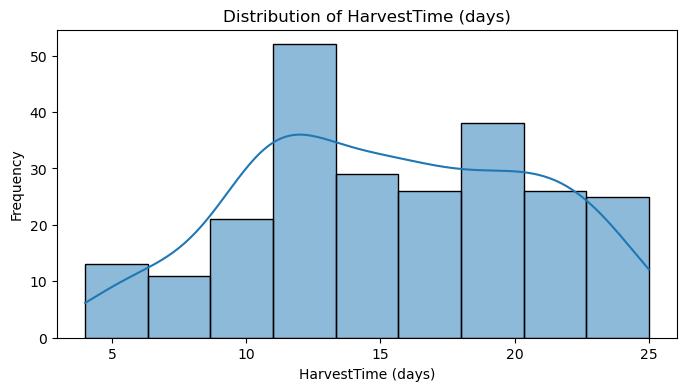

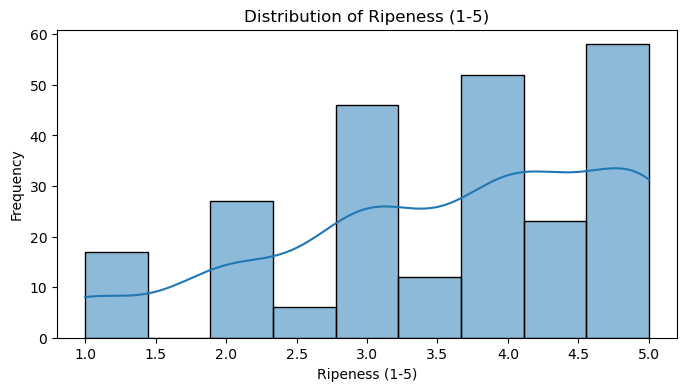

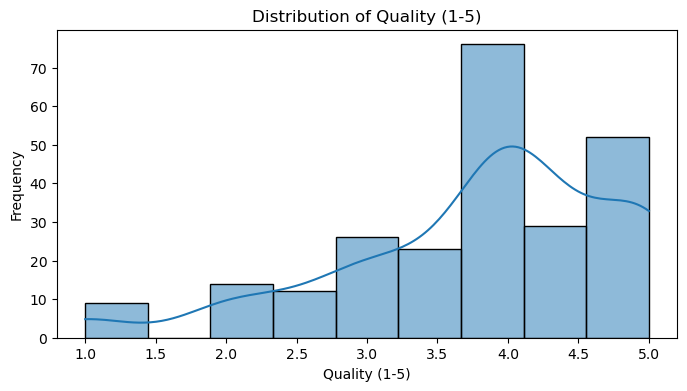

In [11]:
# Membuat displot untuk setiap variabel yang dipilih
variables = ['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)', 
             'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Quality (1-5)']

# Membuat displot untuk setiap variabel
for var in variables:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

1. Distribution of Size (cm): Histogram pertama menggambarkan distribusi ukuran buah dalam satuan sentimeter (cm). Dapat dilihat bahwa ukuran buah cenderung tersebar antara sekitar 6 hingga 10 cm, dengan puncak frekuensi terjadi di sekitar 7,5 hingga 8 cm. Hal ini menunjukkan bahwa sebagian besar buah memiliki ukuran di sekitar nilai ini.

2. Distribution of Weight (g): Histogram kedua menggambarkan distribusi berat buah dalam gram (g). Berat buah tersebar mulai dari sekitar 100 hingga 300 gram. Frekuensi tertinggi terlihat di beberapa interval berat, yang menunjukkan bahwa berat buah cukup beragam dalam data ini.

3. Distribution of Brix (Sweetness): Histogram ketiga menggambarkan distribusi tingkat kemanisan buah, yang diukur dalam satuan Brix. Nilai Brix berada di sekitat 6 hingga 16, dengan puncak frekuensi terlihat di sekitar 10 hingga 14. Ini menunjukkan bahwa sebagian besar buah memiliki tingkat kemanisan di sekitar nilai ini.

4. Distribution of pH (Acidity): Histogram keempat menunjukkan distribusi nilai pH buah, yang mencerminkan tingkat keasaman. Nilai pH berkisar dari sekitar 2,8 hingga 4,4, dengan puncak frekuensi di sekitar 3,2 hingga 3,4. Hal ini menunjukkan bahwa sebagian besar buah memiliki tingkat keasaman di sekitar pH ini.

5. Distribution of Softness (1-5): Histogram kelima menggambarkan distribusi tingkat kelembutan buah pada skala 1 hingga 5. Distribusi ini menunjukkan bahwa buah-buah memiliki kelembutan yang relatif merata di seluruh skala, dengan frekuensi hampir seimbang di setiap tingkat kelembutan.

6. Distribution of Harvest Time (days): Histogram keenam menunjukkan distribusi waktu panen dalam satuan hari. Waktu panen tersebar mulai dari sekitar 3 hingga 25 hari, dengan puncak frekuensi sekitar 10 hingga 15 hari. Ini menunjukkan bahwa sebagian besar buah dipanen dalam rentang waktu tersebut.

7. Distribution of Ripeness (1-5): Histogram ketujuh menunjukkan distribusi tingkat kematangan buah pada skala 1 hingga 5. Distribusi menunjukkan bahwa semakin banyak buah yang memiliki tingkat kematangan tinggi (3-5), dengan frekuensi tertinggi pada tingkat kematangan 4 dan 5.

8. Distribution of Quality (1-5): Histogram ke delapan menggambarkan distribusi kualitas buah pada skala 1 hingga 5. Kualitas buah terlihat bervariasi, dengan frekuensi tertinggi pada tingkat kualitas 4. Hal ini menunjukkan bahwa sebagian besar buah dalam data ini memiliki kualitas yang cukup baik.

## Pair Plot tanpa hue

C:\Users\Nikita Ozzari\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


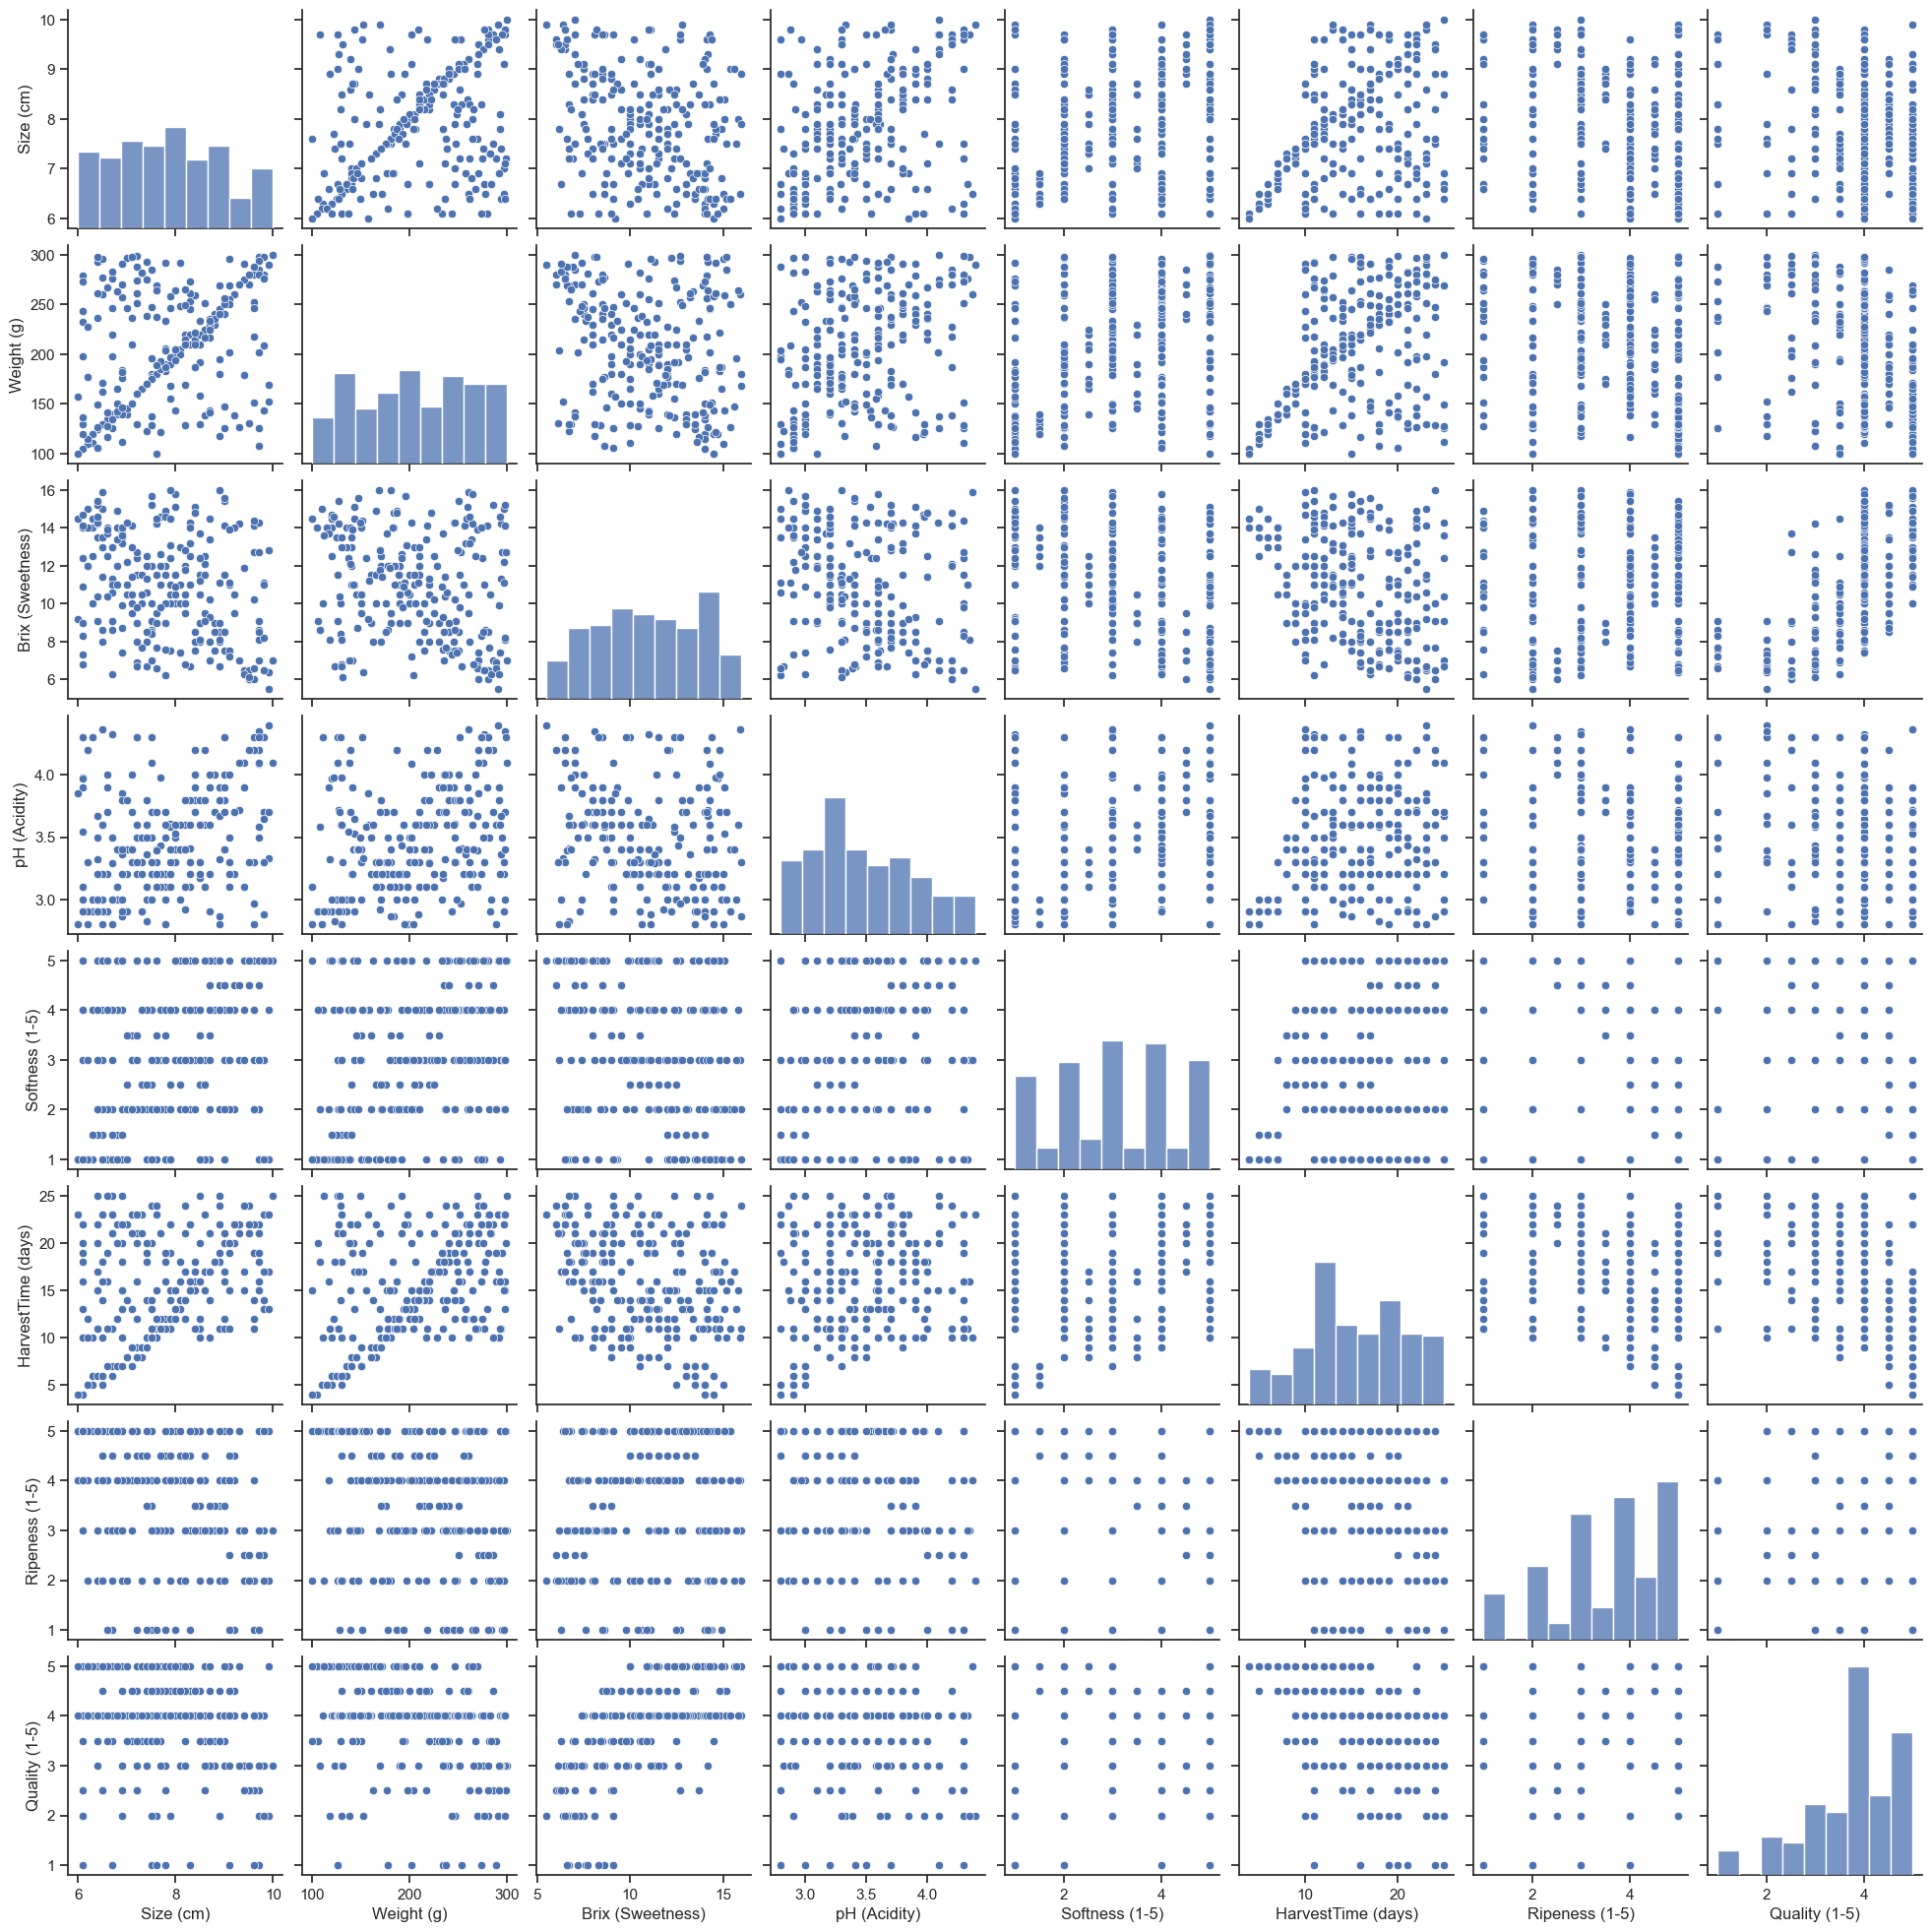

In [15]:
# Kolom yang dipilih
columns_to_plot = ['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 
                   'pH (Acidity)', 'Softness (1-5)', 
                   'HarvestTime (days)', 'Ripeness (1-5)', 
                   'Quality (1-5)']
sns.set(style="ticks", color_codes=True)
# Membuat Pair Plot tanpa hue(variabel kategorik)
sns.pairplot(df[columns_to_plot])  
plt.show()

Hasil gambar pair plot diatas menunjukkan terdapat hubungan antara faktor-faktor atau korelasi antar setiap variabel numerik yang sudah ditentukan.

## Pair Plot dengan menggunakan hue

C:\Users\Nikita Ozzari\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


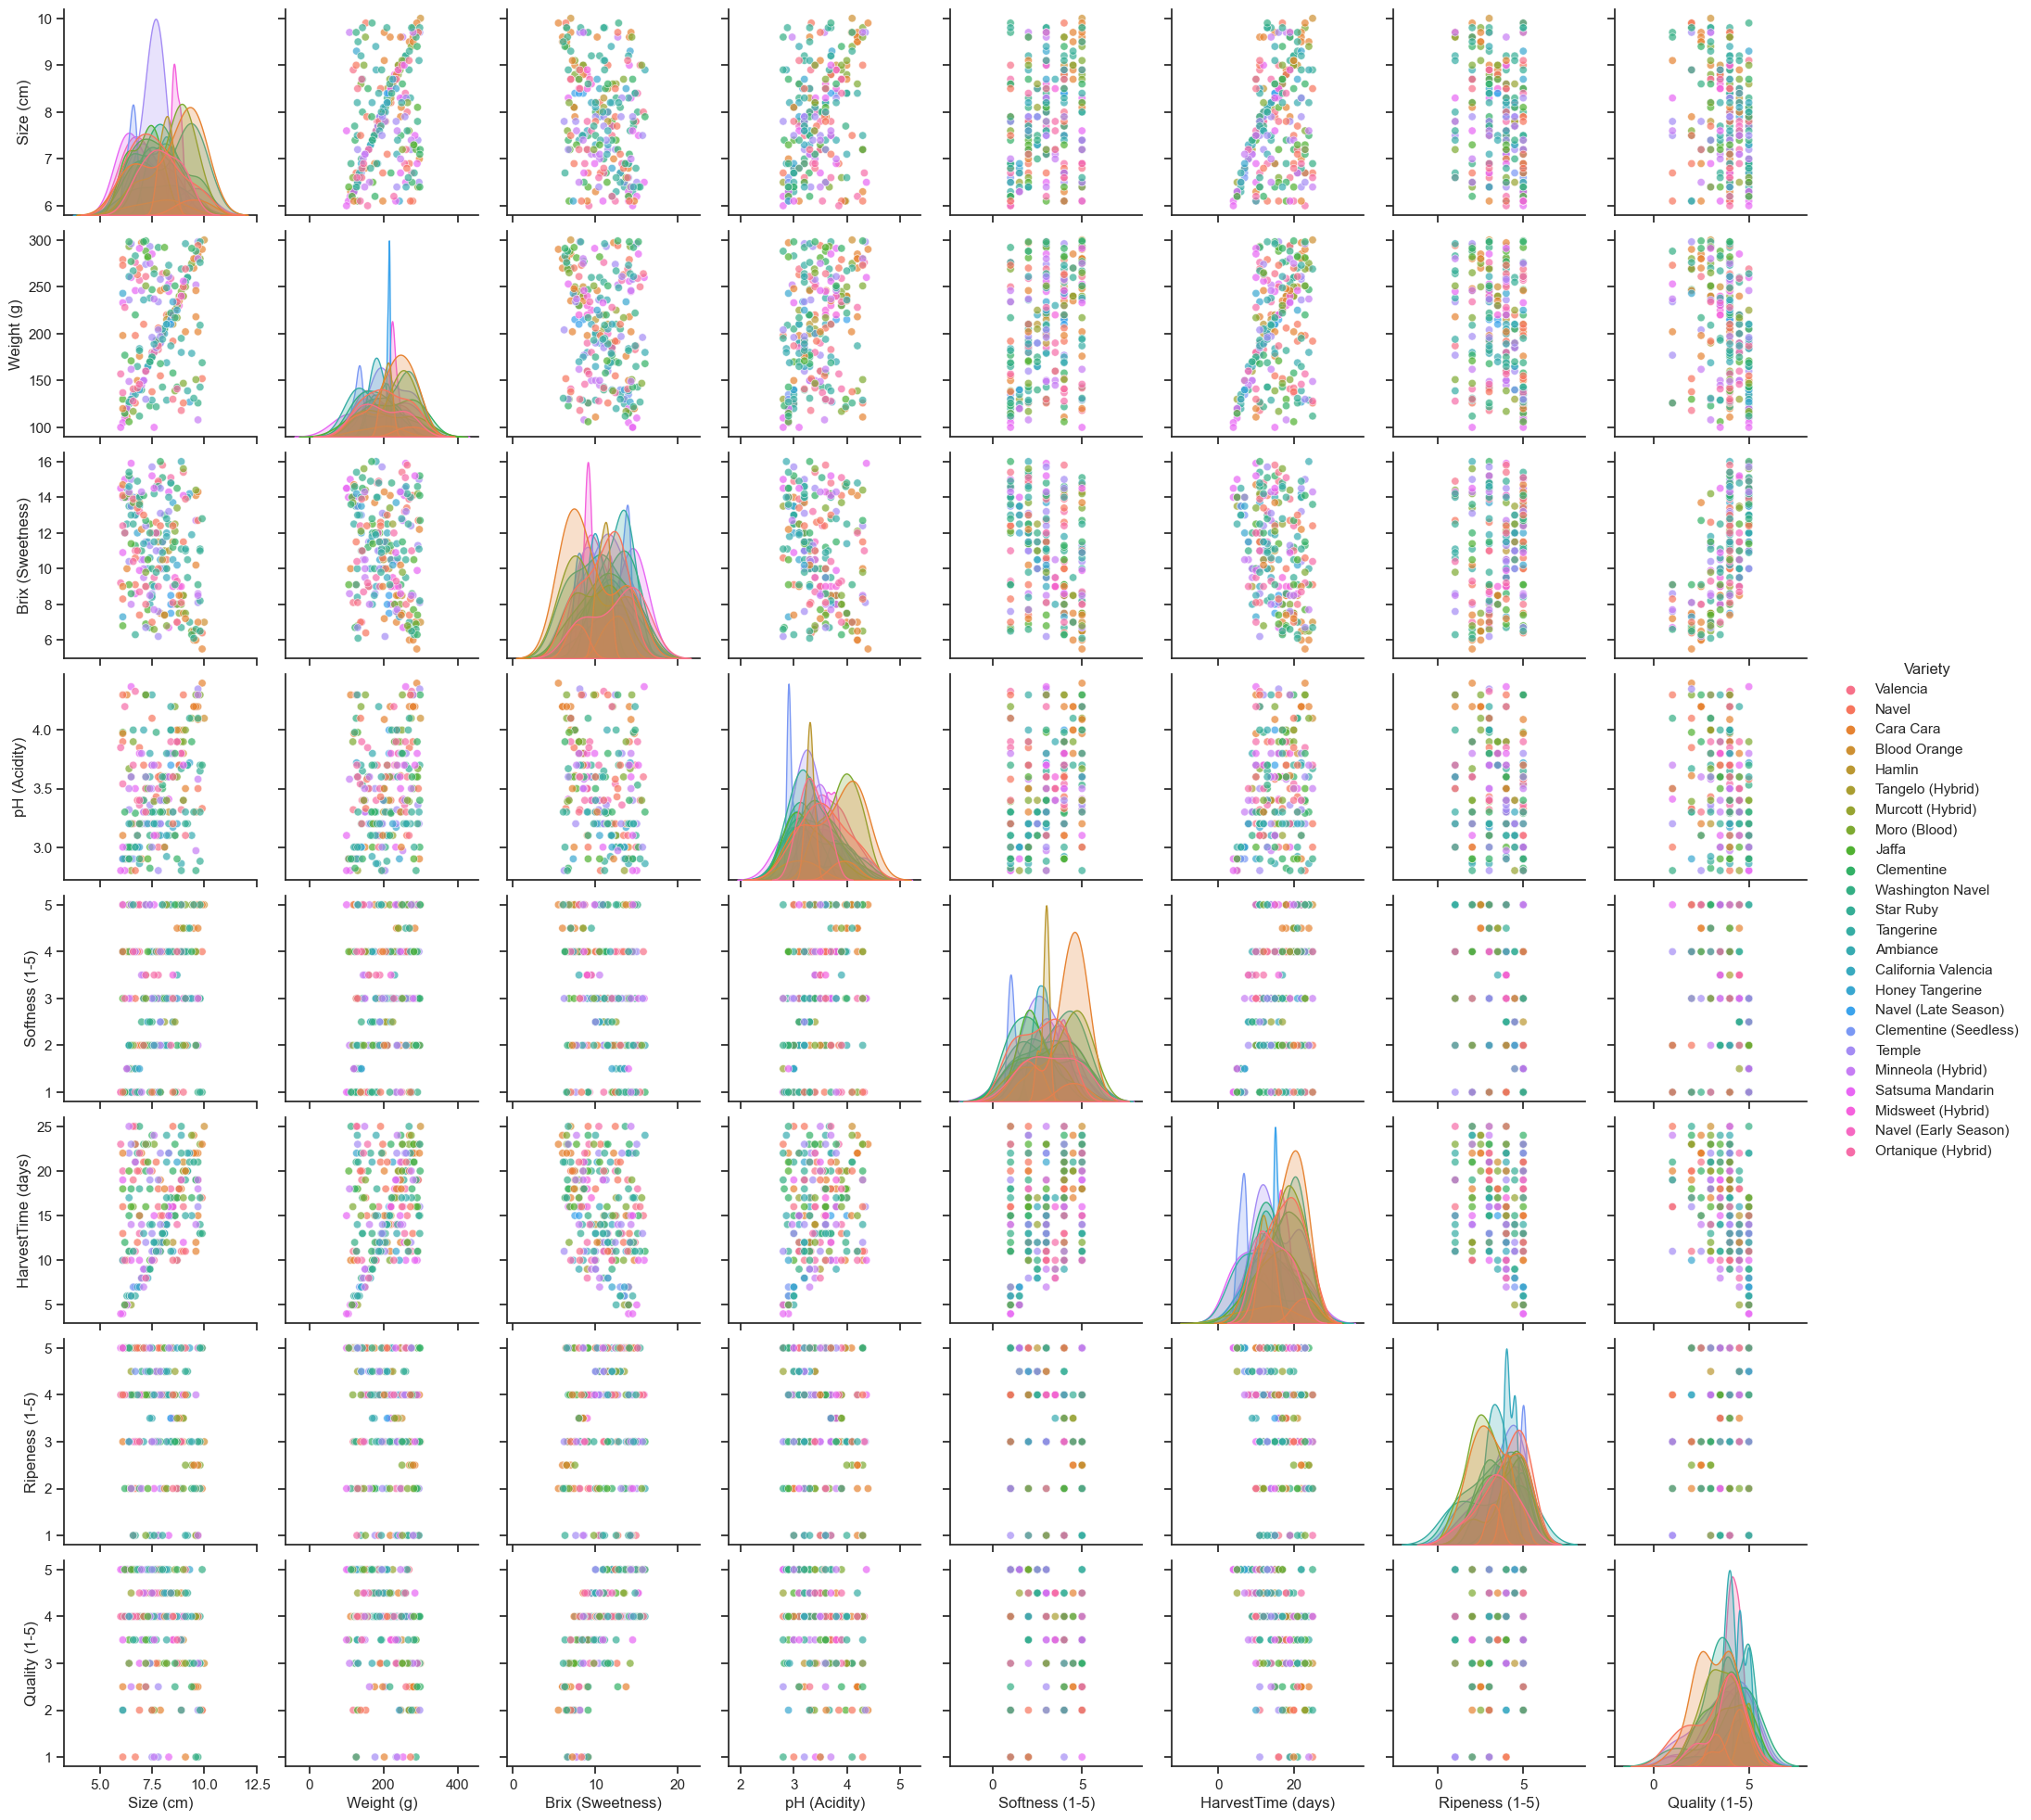

In [16]:
sns.set(style="ticks", color_codes=True)

# Membuat pair plot dari variabel numerik dan kategorik
sns.pairplot(df, 
             vars=['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Quality (1-5)'],  # Sesuaikan dengan kolom numerikal dan ordinal
             hue='Variety',  # Warna berdasarkan varietas jeruk
             plot_kws={'alpha': 0.7})  


plt.show()

Dengan menambahkan hue atau varierty dapat ditunjukkan bahwa terdapat beberapa variabel yang menunjukkan adanya korelasi yang jelas seperti size dan weight (semakin besar ukuran, semakin berat buahnya) lalu 
Setiap varietas jeruk memiliki karakteristik yang sedikit berbeda dalam hal ukuran, kemanisan, keasaman, kelembutan, dan kualitas.
Serta variabel Quality dan Ripeness menunjukkan distribusi yang berbeda untuk setiap variety
Hal ini menunjukkan bahwa kualitas dan tingkat kematangan juga bervariasi antar variety.

## Menghitung Korelasi

In [28]:
# Menghitung korelasi
selected_columns = [
    'Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
    'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Quality (1-5)']
#Menghitung korelasi untuk setiap variabel yang dipilih
correlation_matrix_selected = df[selected_columns].corr()
correlation_matrix_selected

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
Size (cm),1.000000,0.305348,-0.305865,0.330487,0.236863,0.313330,-0.256665,-0.243113
Weight (g),0.305348,1.000000,-0.239659,0.303806,0.316806,0.374670,-0.260454,-0.330268
Brix (Sweetness),-0.305865,-0.239659,1.000000,-0.300080,-0.344376,-0.329862,0.144666,0.631343
pH (Acidity),0.330487,0.303806,-0.300080,1.000000,0.360222,0.262461,-0.232627,-0.321942
Softness (1-5),0.236863,0.316806,-0.344376,0.360222,1.000000,0.331103,-0.202404,-0.302732
HarvestTime (days),0.313330,0.374670,-0.329862,0.262461,0.331103,1.000000,-0.268691,-0.474754
Ripeness (1-5),-0.256665,-0.260454,0.144666,-0.232627,-0.202404,-0.268691,1.000000,0.280764
Quality (1-5),-0.243113,-0.330268,0.631343,-0.321942,-0.302732,-0.474754,0.280764,1.000000


## Menghitung korelasi menggunakan metode Pearson dan Spearman

In [31]:
#Calculate Pearson
#Menghitung matriks korelasi pearson untuk kolom numerik, yang menunjukkan korelasi linear antarvariabel
pearson_corr = df.corr(method='pearson', numeric_only=True)
print(pearson_corr)

#Calculate Spearman
#Menghitung matriks korelasi spearman untuk kolom numerik, yang menunjukkan korelasi linear antarvariabel
spearman_corr = df.corr(method='spearman', numeric_only=True)
print(spearman_corr)

#Correlation
pearson_corr_quality = pearson_corr["Quality (1-5)"].sort_values(ascending=False)
spearman_corr_quality = spearman_corr["Quality (1-5)"].sort_values(ascending=False)

pearson_corr_quality, spearman_corr_quality

                    Size (cm)  Weight (g)  Brix (Sweetness)  pH (Acidity)  \
Size (cm)            1.000000    0.305348         -0.305865      0.330487   
Weight (g)           0.305348    1.000000         -0.239659      0.303806   
Brix (Sweetness)    -0.305865   -0.239659          1.000000     -0.300080   
pH (Acidity)         0.330487    0.303806         -0.300080      1.000000   
Softness (1-5)       0.236863    0.316806         -0.344376      0.360222   
HarvestTime (days)   0.313330    0.374670         -0.329862      0.262461   
Ripeness (1-5)      -0.256665   -0.260454          0.144666     -0.232627   
Quality (1-5)       -0.243113   -0.330268          0.631343     -0.321942   

                    Softness (1-5)  HarvestTime (days)  Ripeness (1-5)  \
Size (cm)                 0.236863            0.313330       -0.256665   
Weight (g)                0.316806            0.374670       -0.260454   
Brix (Sweetness)         -0.344376           -0.329862        0.144666   
pH (Acidit

(Quality (1-5)         1.000000
 Brix (Sweetness)      0.631343
 Ripeness (1-5)        0.280764
 Size (cm)            -0.243113
 Softness (1-5)       -0.302732
 pH (Acidity)         -0.321942
 Weight (g)           -0.330268
 HarvestTime (days)   -0.474754
 Name: Quality (1-5), dtype: float64,
 Quality (1-5)         1.000000
 Brix (Sweetness)      0.622633
 Ripeness (1-5)        0.320729
 Size (cm)            -0.247215
 pH (Acidity)         -0.379239
 Weight (g)           -0.379861
 Softness (1-5)       -0.419605
 HarvestTime (days)   -0.504791
 Name: Quality (1-5), dtype: float64)

## Heatmap

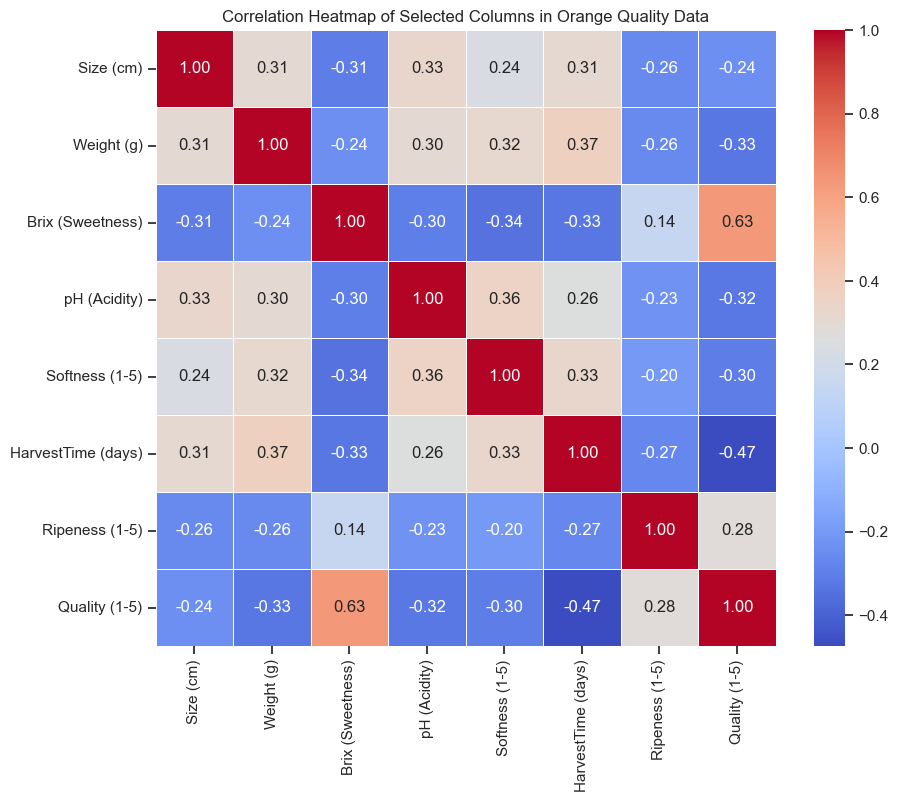

In [29]:
# Menghitung matriks korelasi untuk kolom yang dipilih
correlation_matrix_selected = df[selected_columns].corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))  # Mengatur ukuran gambar
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Menampilkan plot
plt.title('Correlation Heatmap of Selected Columns in Orange Quality Data')
plt.show()

Dari hasil heatmap diatas dapat disimpulkan bahwa 
1. Korelasi positif: 
- Size dan Weight (Semakin besar jeruk maka semakin berat juga beratnya)
- Brix dan Quality (Semakin tinggi brix maka semakin tinggi kualitasnya)
- HarvestTime dan quality (Semakin lama waktu panen maka emakin tinggi kualitas jeruk)

2. Korelasi negatif:
- Brix dan PH (Semakin tinggi Brix (tingkat kemanisan maka semakin rendah keasaman jeruk)
- Waktu Panen dan Kematangan (Semakin lama waktu panen maka semakin rendah tingkat kematangan jeruk)

3. Korelasi Mendekati Nol:
- Size dan Brix (Tidak ada korelasi yang kuat antara ukuran jeruk dan tingkat kemanisan)

- Weight dan pH (Tidak ada korelasi yang kuat antara berat jeruk dan keasaman)

- Softness dan Quality (Tidak ada korelasi yang kuat antara softness dan kualitasnya)

Analisis korelasi ini menunjukkan bahwa terdapat beberapa variabel yang terkait kuat dengan kualitas jeruk, seperti Brix dan waktu panen. Informasi ini dapat digunakan untuk memprediksi kualitas jeruk dengan menganalisis variabel-variabel tersebut. Misalnya, jeruk dengan Brix yang tinggi dan waktu panen yang lama cenderung memiliki kualitas yang lebih baik.